In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import hamming_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = open('/content/drive/MyDrive/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [ ]:
processedList[:100]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(343416, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
Fs = 20
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

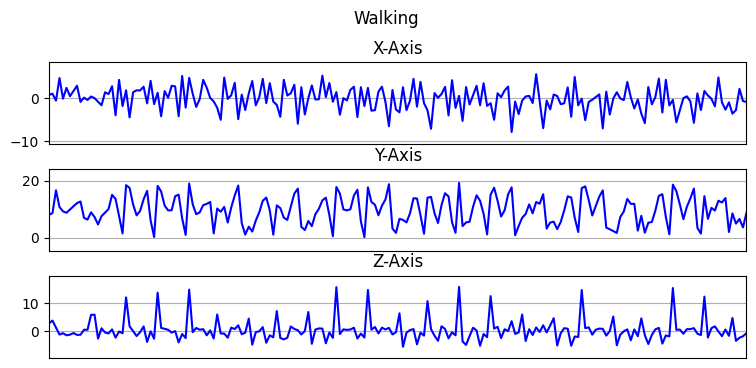

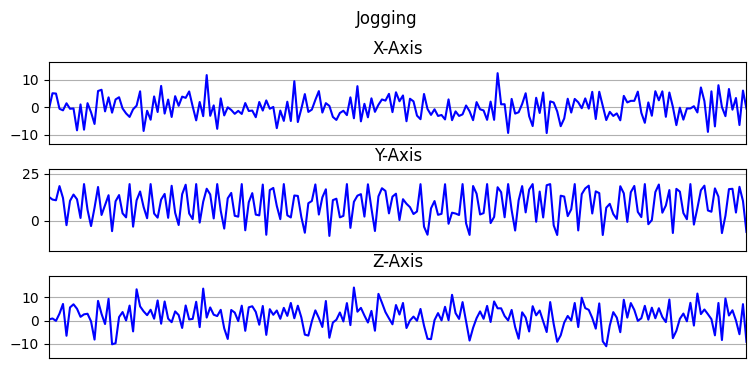

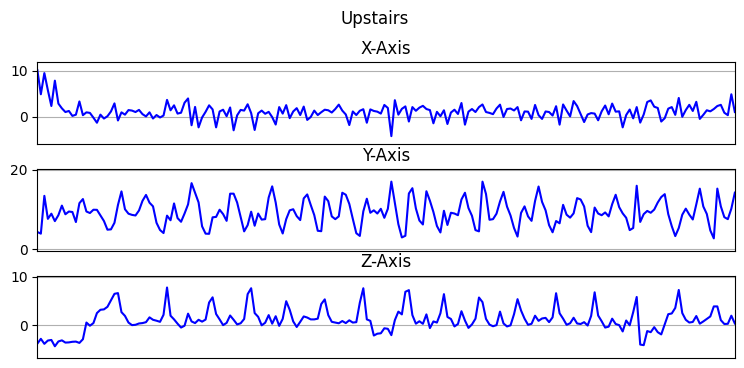

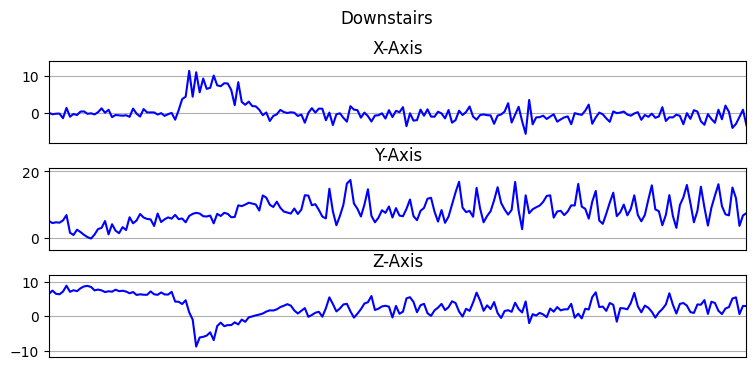

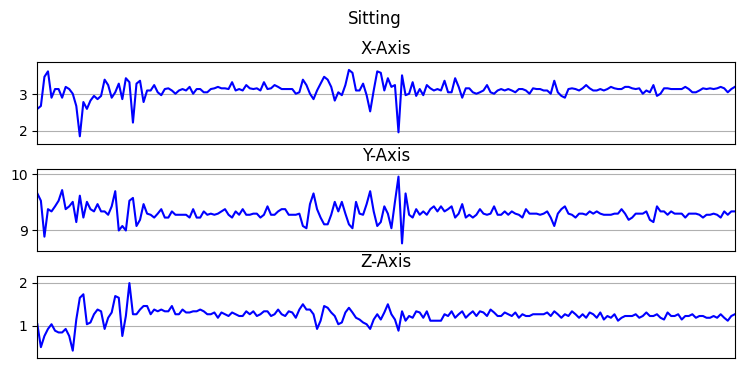

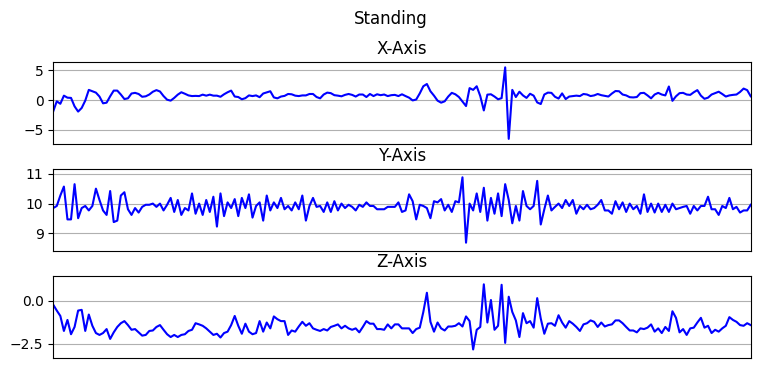

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(9, 4), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.85)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

<ipython-input-15-ce4b99ee90d1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])


(21330, 4)

In [ ]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [ ]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [ ]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [ ]:
df

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
343411,Walking,0.310000,10.730000,0.040861
343412,Walking,2.760000,10.950000,0.844462
343413,Walking,0.800000,10.150000,1.334794
343414,Walking,-1.570000,8.690000,1.416516


In [ ]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        # Retrieve the used label
        # label = stats.mode(df['label'][i: i + frame_size])[0][0]
        label = stats.mode(df['label'][i: i + frame_size], axis=None, keepdims=True).mode[0]

        frames.append([x, y, z])
        labels.append(label)

    # Reshape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((532, 80, 3), (532,))

In [ ]:
frame_size

80

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [ ]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [ ]:
pip install keras-self-attention


  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=89f17b3687b4cc8bbb14953f0dddc5e92689e2dc8fbd2ffa867863890a1be600
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Flatten, Reshape, Layer, Add
from keras_self_attention import SeqSelfAttention

# Custom Residual Attention layer
class ResidualAttention(SeqSelfAttention):
    def __init__(self, residual=True, **kwargs):
        self.residual = residual
        super(ResidualAttention, self).__init__(**kwargs)

    def call(self, inputs, initial_states=None, **kwargs):
        attention_output = super(ResidualAttention, self).call(inputs, initial_states=initial_states, **kwargs)

        if self.residual:
            return Add()([attention_output, inputs])
        else:
            return attention_output

# Input layer
model = Sequential()

# Reshape input data to (time_steps, features, channels) before applying BiLSTM
model.add(Reshape((80, 3), input_shape=(80, 3, 1)))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Bidirectional LSTM Stacked

model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Self-Attention layer with residual connection
model.add(ResidualAttention(attention_activation='sigmoid', residual=True))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(6, activation='softmax'))

# Display the model summary
model.summary()


In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.003), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 150, validation_data= (X_test, y_test), verbose=1)

Epoch 1/150
14/14 [==============================] - 18s 209ms/step - loss: 1.3411 - accuracy: 0.4918 - val_loss: 0.5586 - val_accuracy: 0.8224
Epoch 2/150
14/14 [==============================] - 0s 28ms/step - loss: 0.5557 - accuracy: 0.7953 - val_loss: 0.2987 - val_accuracy: 0.9065
Epoch 3/150
14/14 [==============================] - 0s 25ms/step - loss: 0.4242 - accuracy: 0.8518 - val_loss: 0.3402 - val_accuracy: 0.8692
Epoch 4/150
14/14 [==============================] - 0s 34ms/step - loss: 0.4980 - accuracy: 0.8235 - val_loss: 0.2683 - val_accuracy: 0.9065
Epoch 5/150
14/14 [==============================] - 0s 26ms/step - loss: 0.3365 - accuracy: 0.8682 - val_loss: 0.2046 - val_accuracy: 0.9252
Epoch 6/150
14/14 [==============================] - 1s 38ms/step - loss: 0.2640 - accuracy: 0.8988 - val_loss: 0.4541 - val_accuracy: 0.8598
Epoch 7/150
14/14 [==============================] - 0s 28ms/step - loss: 0.3051 - accuracy: 0.8871 - val_loss: 0.2276 - val_accuracy: 0.9159
Epoc

4/4 [==============================] - 1s 9ms/step


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

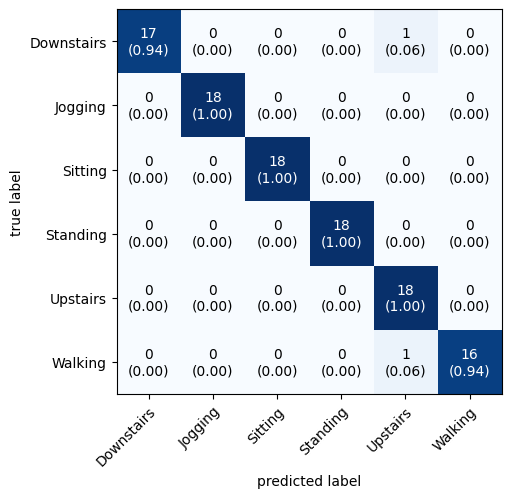

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(5,5))

In [ ]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.8 MB/s eta 0:00:00


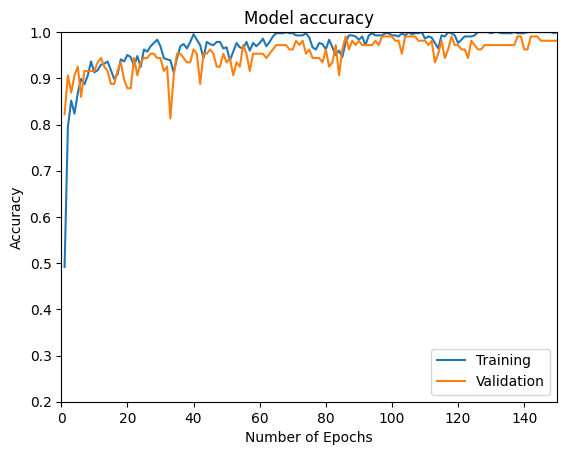

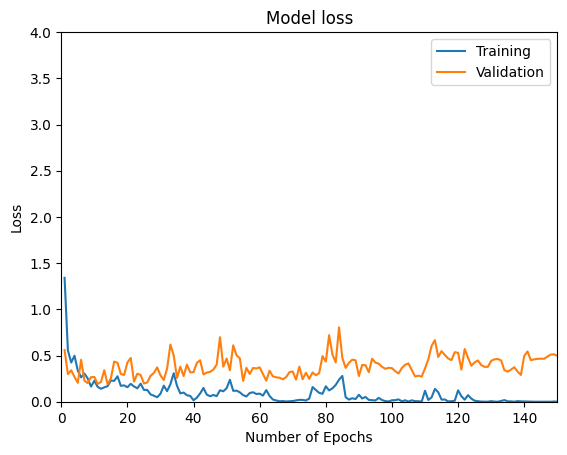

In [ ]:
def plot_learningCurve(history, epochs):
  # Plotting the accuracy graph of training & validation
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of Epochs')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.axis([0, epochs, 0.2, 1])
  plt.show()

  # Plotting the loss graph of training & validation
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Number of Epochs')
  plt.legend(['Training', 'Validation'], loc='upper right')

  plt.axis([0, epochs, 0, 4])
  plt.show()

plot_learningCurve(history, 150)

In [ ]:
epochs=150

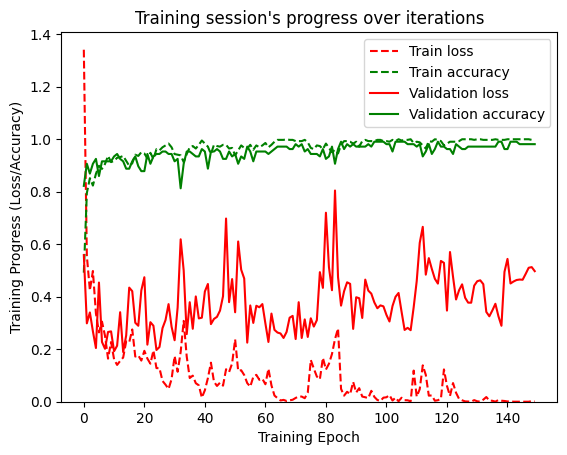

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must not be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

truth = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
prediction = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]

4/4 [==============================] - 0s 7ms/step


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

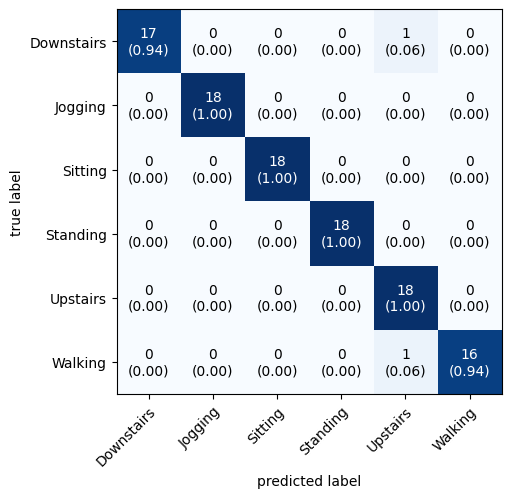

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(5,5))

In [ ]:
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("Recall Score : ",recall_score(y_test, y_pred, average=None))
print("Accuracy Score :", accuracy_score(y_test, y_pred, normalize=True))
print("Loss Score :", hamming_loss(y_test, y_pred))

Precision Score :  [1.  1.  1.  1.  0.9 1. ]
Recall Score :  [0.94444444 1.         1.         1.         1.         0.94117647]
Accuracy Score : 0.9813084112149533
Loss Score : 0.018691588785046728


4/4 [==============================] - 0s 8ms/step
AUC: 0.9960331448434555


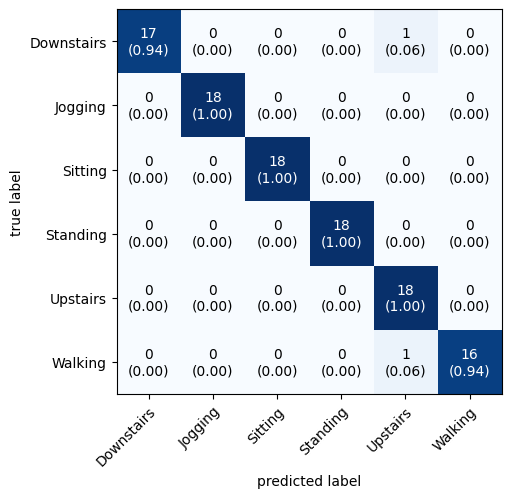

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test and y_test are your test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

# Calculate AUC
y_true_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=6)  # Assuming 6 classes
auc = roc_auc_score(y_true_one_hot, y_pred_probs, multi_class='ovr')

# Display AUC
print("AUC:", auc)

# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(5,5))

# Additional visualization (optional)
plt.show()


4/4 [==============================] - 0s 7ms/step


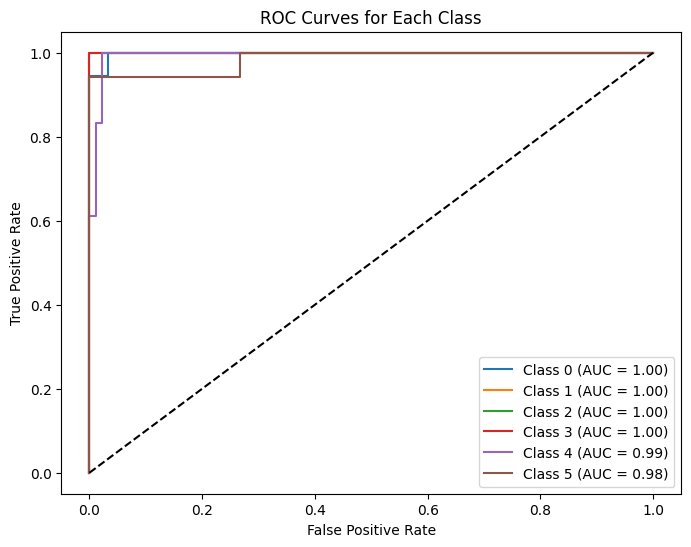

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_test and y_test are your test data
y_pred_probs = model.predict(X_test)

# Assuming y_test is your true labels
plt.figure(figsize=(8, 6))

for class_idx in range(6):  # Assuming 6 classes
    # Get true labels for the current class
    y_true_class = (y_test == class_idx).astype(int)

    # Get predicted probabilities for the current class
    y_pred_class = y_pred_probs[:, class_idx]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)

    # Calculate AUC for the current class
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each class on the same plot
    plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')

# Display the plot (optional)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming X_test and y_test are your test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Assuming label is your encoder for class labels
# If not, you can replace label.classes_ with the actual class names
class_names = label.classes_

# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=class_names))


4/4 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

  Downstairs       1.00      0.94      0.97        18
     Jogging       1.00      1.00      1.00        18
     Sitting       1.00      1.00      1.00        18
    Standing       1.00      1.00      1.00        18
    Upstairs       0.90      1.00      0.95        18
     Walking       1.00      0.94      0.97        17

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



1/1 [==============================] - 0s 29ms/step


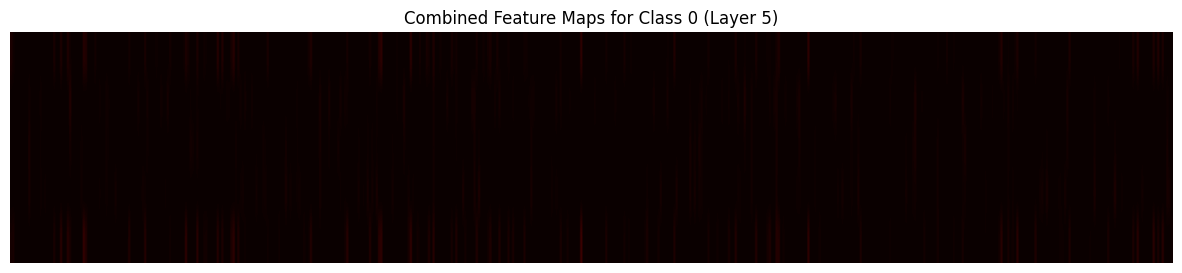

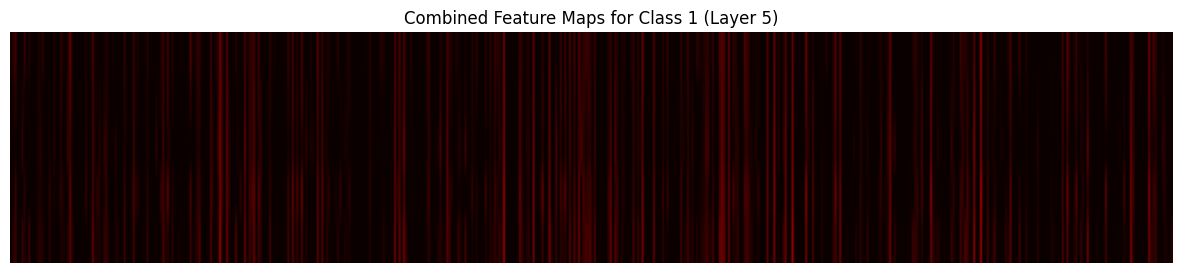

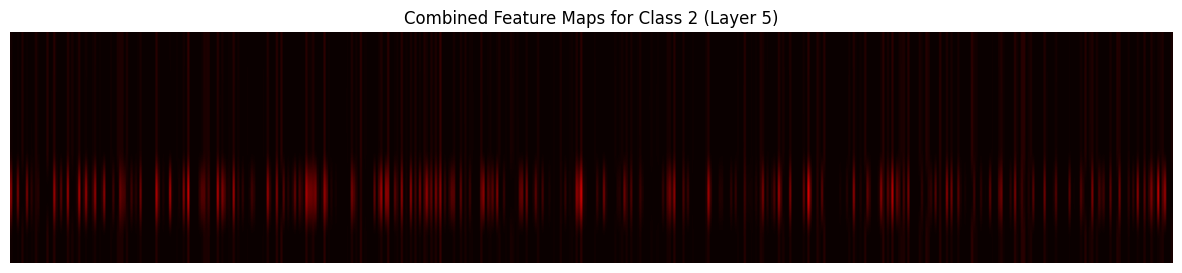

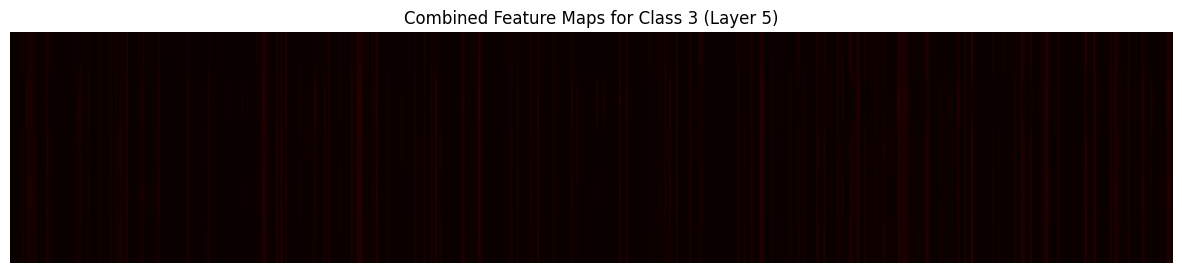

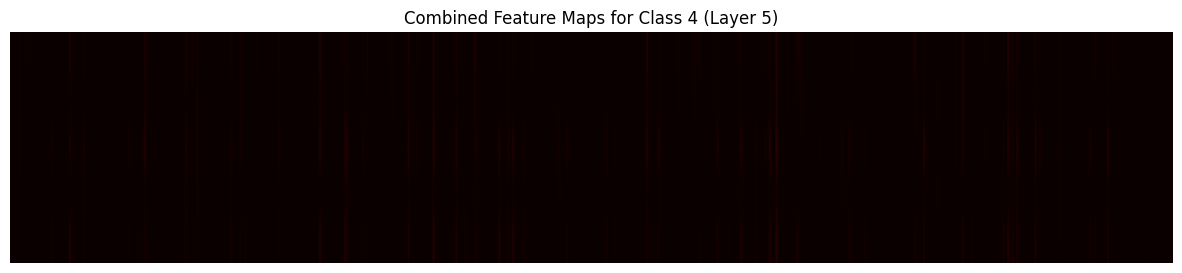

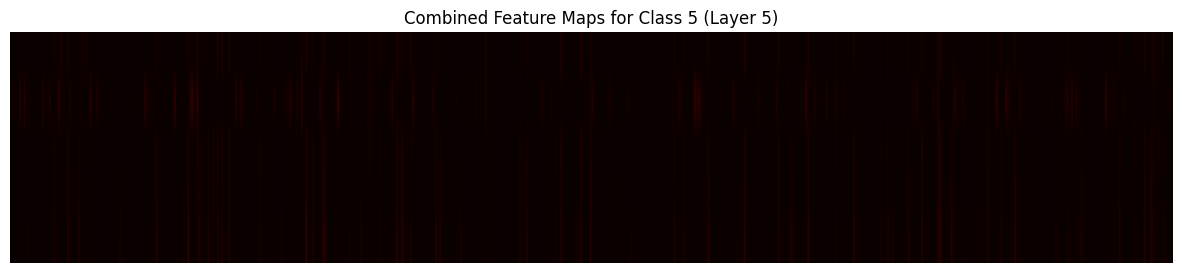

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assuming X_test and y_test are your test data
class_indices = [0, 1, 2, 3, 4, 5]  # Specify the class indices for which you want to visualize feature maps

# Choose the layer index from which you want to extract feature maps
layer_index = 5  # Adjust this index based on your model architecture

# Create a new model that outputs the activations of the specified layer
feature_map_model = Model(inputs=model.input, outputs=model.layers[layer_index].output)

# Get the feature maps for the specified classes
class_feature_maps = {}
for class_idx in class_indices:
    # Get samples for the current class
    class_samples_indices = np.where(y_test == class_idx)[0][:5]  # Take 5 samples for visualization
    class_samples = X_test[class_samples_indices]

    # Get feature maps for the current class
    class_feature_maps[class_idx] = feature_map_model.predict(class_samples)

# Visualize feature maps for each class in a single plot
for class_idx in class_indices:
    # plt.figure(figsize=(15, 3))
    for i in range(5):  # Display 5 samples
        # plt.subplot(1, 5, i+1)

        # Check if the feature maps are flattened
        if len(class_feature_maps[class_idx][i].shape) == 1:
            height, width = 1, len(class_feature_maps[class_idx][i])
        else:
            height, width, _ = class_feature_maps[class_idx][i].shape

        reshaped_feature_map = class_feature_maps[class_idx][i].reshape((height, width))

        # Normalize to [0, 1]
        normalized_feature_map = (reshaped_feature_map - reshaped_feature_map.min()) / (reshaped_feature_map.max() - reshaped_feature_map.min())

        # Convert to uint8
        uint8_feature_map = (normalized_feature_map * 255).astype(np.uint8)

        # plt.imshow(uint8_feature_map, cmap='gray', vmin=0, vmax=255)  # Adjust cmap based on your data
        # plt.title(f'Sample {i+1}')
        # plt.axis('off')

    # Combine feature maps horizontally for each sample
    combined_feature_maps = np.concatenate([class_feature_maps[class_idx][i].reshape(1, -1) for i in range(5)], axis=0)

    # Display the combined feature maps with a heatmap colormap
    plt.figure(figsize=(15, 3))
    plt.imshow(combined_feature_maps, cmap='hot', aspect='auto', norm=Normalize(vmin=0, vmax=255))  # Use 'hot' colormap
    plt.title(f'Combined Feature Maps for Class {class_idx} (Layer {layer_index})')
    plt.axis('off')
    plt.show()


4/4 [==============================] - 0s 7ms/step


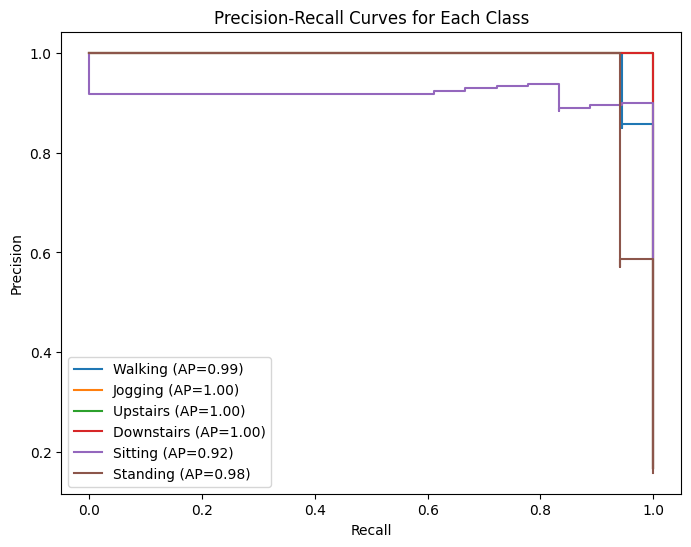

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming X_test and y_test are your test data
y_pred_logits = model.predict(X_test)  # Use predict for raw logits
y_pred_prob = tf.nn.softmax(y_pred_logits, axis=-1).numpy()  # Apply softmax to get probabilities

# Plot precision-recall curves for all classes in the same figure
plt.figure(figsize=(8, 6))

for class_idx in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(y_test == class_idx, y_pred_prob[:, class_idx])
    average_precision = average_precision_score(y_test == class_idx, y_pred_prob[:, class_idx])

    plt.step(recall, precision, label=f'{class_labels[class_idx]} (AP={average_precision:.2f})', where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()
